<a href="https://colab.research.google.com/github/adielws/covid19-questions/blob/master/covid19_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importando *dataset* do Google Drive



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#!ls '/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv'
!ls '/content/drive/Shared drives/TRABALHO_POS/FULL.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/Shared drives/TRABALHO_POS/FULL.csv'


In [ ]:
import pandas as pd
import datetime
import numpy as np

#data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/FULL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
data.head()

data              usuario  ... longitude hashtags
0  2020-03-23 18:51:14             Gaboardi  ...       NaN       []
1  2020-03-18 03:18:14   Seu Zé da Farmácia  ...       NaN       []
2  2020-03-29 12:09:27  Marília Oliveira 🇧🇷  ...       NaN       []
3  2020-04-01 21:11:07                    🚩  ...       NaN       []
4  2020-03-19 17:49:40       Nova Impressão  ... -15.77691       []

[5 rows x 13 columns]

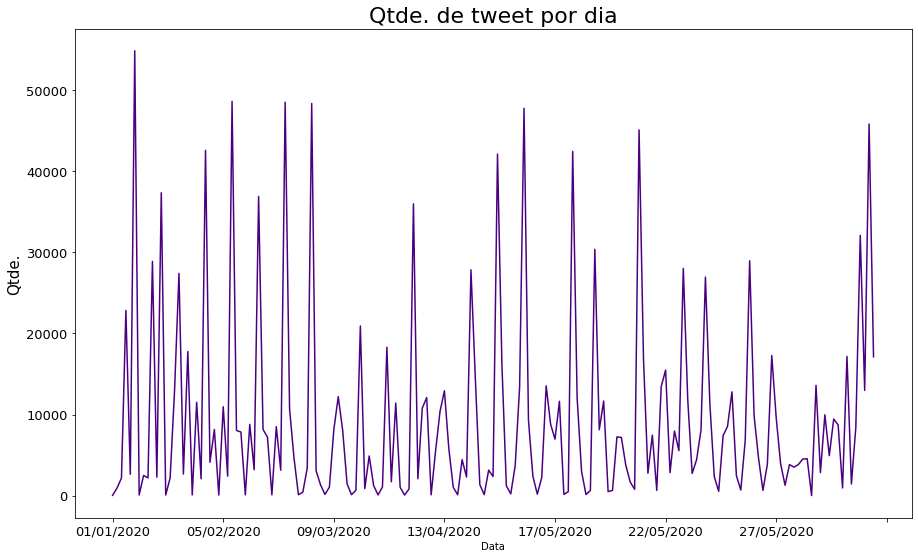

In [ ]:
import matplotlib.pyplot as plt
data['data'] = pd.to_datetime(data["data"])
df = data.groupby(pd.to_datetime(data.data).dt.strftime('%d/%m/%Y')).data.count()

ax = df.plot(kind='line', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por dia", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Data", fontsize=10);
plt.show()

In [ ]:
conditions = [
    (data.data.dt.hour >= 0) & (data.data.dt.hour <=6),
    (data.data.dt.hour > 6) & (data.data.dt.hour <=12),
    (data.data.dt.hour > 12) & (data.data.dt.hour <=18),
    (data.data.dt.hour > 18) & (data.data.dt.hour <=23)
    ]
values = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

data['partes_dia'] = np.select(conditions, values)
data['dia_da_semana'] = data.data.dt.day_name()


data['dia_da_semana'] = pd.Categorical(data['dia_da_semana'], categories=
    ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)

data['partes_dia'] = pd.Categorical(data['partes_dia'], categories=
    ['MADRUGADA', 'MANHÃ','TARDE','NOITE'],
    ordered=True)

data.head()

data              usuario  ... partes_dia dia_da_semana
0 2020-03-23 18:51:14             Gaboardi  ...      TARDE        Monday
1 2020-03-18 03:18:14   Seu Zé da Farmácia  ...  MADRUGADA     Wednesday
2 2020-03-29 12:09:27  Marília Oliveira 🇧🇷  ...      MANHÃ        Sunday
3 2020-04-01 21:11:07                    🚩  ...      NOITE     Wednesday
4 2020-03-19 17:49:40       Nova Impressão  ...      TARDE      Thursday

[5 rows x 15 columns]

In [ ]:
data = data.sort_values(by='seguidores',ascending=False)
data.head()

data          usuario  ... partes_dia dia_da_semana
788393  2020-05-23 23:08:17  Donald J. Trump  ...      NOITE      Saturday
610962  2020-05-12 09:40:41          Reuters  ...      MANHÃ       Tuesday
113733  2020-04-16 15:40:07   CNN en Español  ...      TARDE      Thursday
1491980 2020-04-07 21:30:08   CNN en Español  ...      NOITE       Tuesday
1519974 2020-02-26 03:28:52   Danilo Gentili  ...  MADRUGADA     Wednesday

[5 rows x 15 columns]

In [ ]:
df0 = data.groupby('usuario').seguidores.max()
df0.to_frame

df0.head(50)

usuario
 ESTSOCCIENCIA                               73
 Elina Puppy                                  1
 Evangelista                                 10
 Gloria Almeida                              28
 Lidia                                       81
 Morena                                     374
 Patric                                      33
 REMEI PAU FAYOS                            133
 Roberto Ayres                               38
 Simone Silva Gomes                          25
 Wilson Portela                              37
 amelia rodrigues                             2
 celso medeiros                             144
 roseny vieira                                3
!                                          4864
! Bl3nd3r                                 24803
! Kiri                                       25
! Theo !                                     15
! joo                                        96
! ¡                                          38
! 𝐚𝐭 𝐭𝐡𝐞 𝐝𝐢𝐬𝐜𝐨 シ︎ ✊🏾✨           

In [ ]:
#data = data.sort_values(by='seguidores',ascending=False)
df0 = data.groupby(['usuario']).seguidores.max()[:10]

df0 = df0.sort_values(ascending=False)

df0

usuario
 Morena                374
 REMEI PAU FAYOS       133
 Lidia                  81
 ESTSOCCIENCIA          73
 Roberto Ayres          38
 Patric                 33
 Gloria Almeida         28
 Simone Silva Gomes     25
 Evangelista            10
 Elina Puppy             1
Name: seguidores, dtype: int64

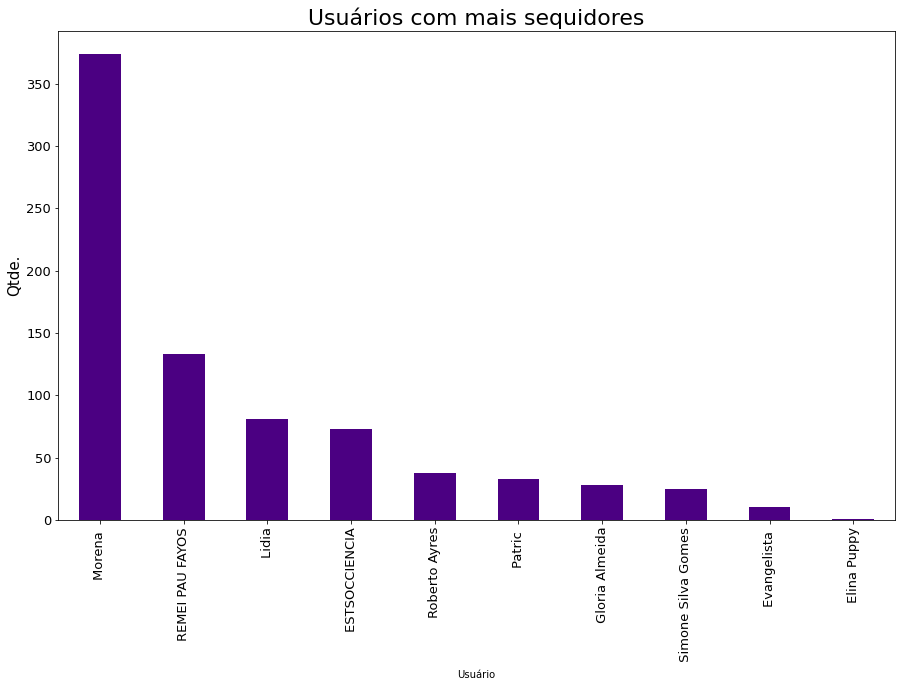

In [ ]:
# estou desenvolvendo
ax = df0.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Usuários com mais sequidores", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Usuário", fontsize=10);
plt.show()

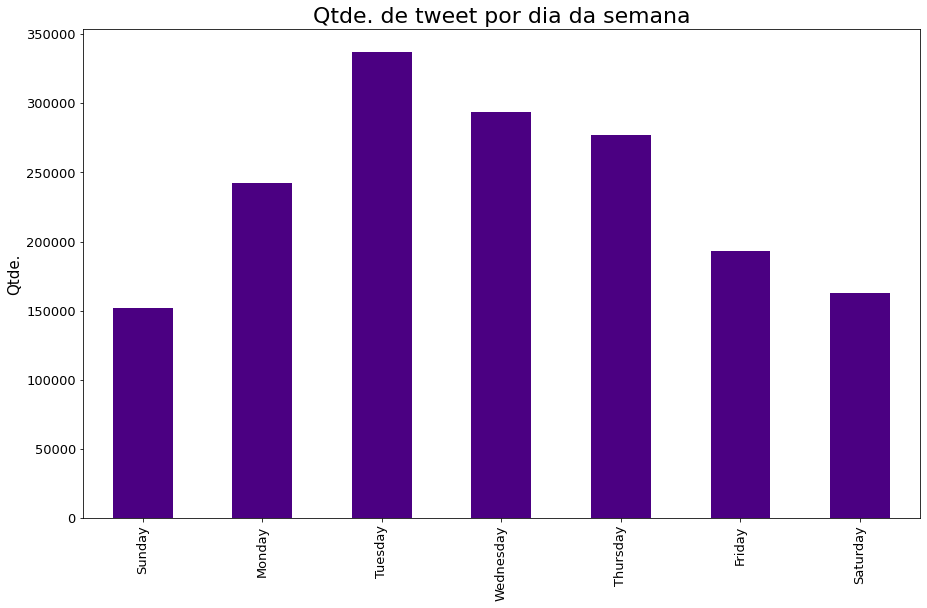

In [ ]:
df1 = data.groupby('dia_da_semana').dia_da_semana.count()

ax = df1.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por dia da semana", fontsize=22)


ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("", fontsize=10);

plt.show()

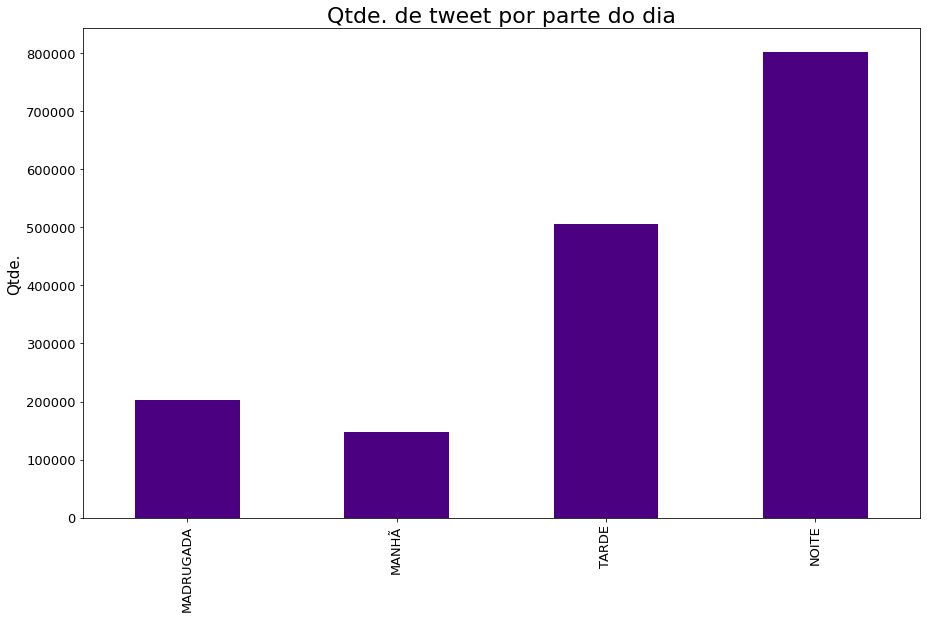

In [ ]:
df2 = data.groupby('partes_dia').dia_da_semana.count()

ax = df2.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por parte do dia", fontsize=22)

ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("", fontsize=10);

plt.show()

# Visualizando informações básicas do *dataset*


In [ ]:
data.shape

(1658825, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658825 entries, 788393 to 899761
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   data           1658825 non-null  datetime64[ns]
 1   usuario        1658768 non-null  object        
 2   apelido        1658825 non-null  object        
 3   texto          1658825 non-null  object        
 4   retweet        1658825 non-null  int64         
 5   seguidores     1658825 non-null  int64         
 6   idioma         1658825 non-null  object        
 7   lugar          74605 non-null    object        
 8   pais           74600 non-null    object        
 9   sigla          74595 non-null    object        
 10  latitude       8720 non-null     float64       
 11  longitude      8720 non-null     float64       
 12  hashtags       1658825 non-null  object        
 13  partes_dia     1658825 non-null  category      
 14  dia_da_semana  1658825 non-nul

In [ ]:
data.idioma.unique() # categorias de idiomas

array(['en', 'pt', 'it', 'ca', 'es', 'fr', 'ar', 'ru', 'ja', 'in', 'nl',
       'und', 'tr', 'hi', 'fa', 'fi', 'sv', 'th', 'vi', 'cs', 'de', 'no',
       'zh', 'ta', 'ur', 'et', 'iw', 'el', 'ht', 'lt', 'tl', 'pl', 'sd',
       'sr', 'ro', 'lv', 'hu', 'cy', 'ne', 'ko', 'mr', 'eu', 'is', 'si',
       'da', 'bg', 'bn', 'sl', 'ckb', 'uk', 'te', 'ps', 'gu', 'am', 'my',
       'or', 'ml', 'dv', 'kn'], dtype=object)

In [ ]:
data.pais.unique() # categorias de países

array([nan, 'Brazil', 'Italy', 'United States', 'Dominican Republic',
       'Canada', 'Portugal', "People's Republic of China",
       'United Arab Emirates', 'Spain', 'Ghana', 'Turkey', 'Japan',
       'Kenya', 'Nigeria', 'Republic of Mozambique', 'France', 'Ireland',
       'United Kingdom', 'North Korea', 'Switzerland', 'Paraguay',
       'Panama', 'Argentina', 'South Africa', 'Kingdom of Saudi Arabia',
       'Mexico', 'Nicaragua', 'New Zealand', 'Australia', 'Angola',
       'India', 'Chile', 'Guinea', 'Bolivia', 'Uganda', 'Belgium',
       'Romania', 'Vietnam', 'Tanzania', 'Hashemite Kingdom of Jordan',
       'El Salvador', 'Colombia', 'Lebanon', 'Senegal', 'Namibia',
       'Cameroon', 'Kuwait', 'Denmark', 'Uruguay', 'Germany', 'Ukraine',
       'Israel', 'Republic of the Philippines', 'Guadeloupe', 'Peru',
       'Republic of Croatia', 'Venezuela', 'Singapore', 'The Netherlands',
       'Sweden', 'Costa Rica', 'Cyprus', 'Trinidad and Tobago', 'Russia',
       'Luxembourg', 'Z

In [ ]:
data.sigla.unique() # categorias de siglas

array([nan, 'BR', 'IT', 'US', 'DO', 'CA', 'PT', 'CN', 'AE', 'ES', 'GH',
       'TR', 'JP', 'KE', 'NG', 'MZ', 'FR', 'IE', 'GB', 'KP', 'CH', 'PY',
       'PA', 'AR', 'ZA', 'SA', 'MX', 'NI', 'NZ', 'AU', 'AO', 'IN', 'CL',
       'GN', 'BO', 'UG', 'BE', 'RO', 'VN', 'TZ', 'JO', 'SV', 'CO', 'LB',
       'SN', 'CM', 'KW', 'DK', 'UY', 'DE', 'UA', 'IL', 'PH', 'GP', 'PE',
       'HR', 'VE', 'SG', 'NL', 'SE', 'CR', 'CY', 'TT', 'RU', 'LU', 'ZW',
       'ID', 'PK', 'CZ', 'MY', 'EG', 'CI', 'AM', 'IQ', 'EC', 'XK', 'LK',
       'AT', 'CF', 'MC', 'MT', 'IR', 'ME', 'GW', 'SK', 'EE', 'CU', 'HN',
       'LT', 'HU', 'PL', 'CV', 'KZ', 'VA', 'GF', 'KR', 'TW', 'NO', 'AD',
       'MG', 'JM', 'SI', 'TH', 'GT', 'QA', 'MA', 'BW', 'MO', 'LA', 'FI',
       'TL', 'CD', 'OM', 'SR', 'GR', 'HT', 'TD', 'CW', 'GE', 'BS', 'BH'],
      dtype=object)

In [ ]:
data.data.min() # data do tweet mais antigo

Timestamp('2020-01-01 00:42:12')

In [ ]:
data.data.max() # data do tweet mais recente

Timestamp('2020-07-28 17:19:44')

In [ ]:
data.hashtags.describe() # detalhes da coluna hashtags

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

# Analisando a Frequência das Hashtags


Nesta seção, vamos visualizar a frequência das hashtags no nosso dataset. Para isso, vamos utilizar um gráfico conhecido como nuvem de palavras. Nós vamos implementar usando a biblioteca [Wordcloud](https://https://github.com/amueller/word_cloud).

In [ ]:
!pip install wordcloud -q

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Nós vamos criar uma série a partir do atributo *hashtag* do dataframe. Nós vamos incluir nessa série apenas os valores não faltantes.

In [ ]:
hashtags = data.dropna(subset=['hashtags'])['hashtags']
hashtags.describe()

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

In [ ]:
hashtags.unique() # visualizando valores únicos.

array(['[]', "['BBB20', 'Encontro']", "['coronavírus']", ...,
       "['edição16']",
       "['summer', 'estate', 'coronavirus', 'COVID19', '5maggio']",
       "['coronavirus', 'coronavirusPandemic', 'covid19', 'ChineseVirusInIndia']"],
      dtype=object)

Podemos ver que cada item da série é um array de strings, cujos valores são as hashtags de uma linha do dataframe. Portanto, precisamos separar esses valores em strings individuais, para que possamos calcular sua frequência.

Mas antes vamos remover da série os itens cujo valor é um array vazio. Eles são os itens que têm o valor '[]'.

In [ ]:
hashtags = hashtags[hashtags != '[]'] # removendo itens que não tem hashtags
hashtags.describe()

count          163256
unique          63837
top       ['COVID19']
freq             9951
Name: hashtags, dtype: object

In [ ]:
hashtags.unique() # visualizando valores únicos. Veja que não existe mais o valor '[]'.

array(["['BBB20', 'Encontro']", "['coronavírus']", "['G1']", ...,
       "['edição16']",
       "['summer', 'estate', 'coronavirus', 'COVID19', '5maggio']",
       "['coronavirus', 'coronavirusPandemic', 'covid19', 'ChineseVirusInIndia']"],
      dtype=object)

Agora vamos dividir os arrays em palavras e, por fim.

In [ ]:
def split(item):
  "This parses a string of a list of words into an array of individual words"
  tags = str(item).translate({ord(i): None for i in ' []\''})
  return tags.split(',')

hashtags = hashtags.apply(split)
hashtags = np.concatenate(hashtags.values.tolist())

Vamos concatenar todas as palavras em uma só, separando-as com espaço.

Em seguida, criaremos a nuvem de palavras usando a biblioteca Wordcloud.

Por fim, vamos exibi-la usando a biblioteca Matplotlib.

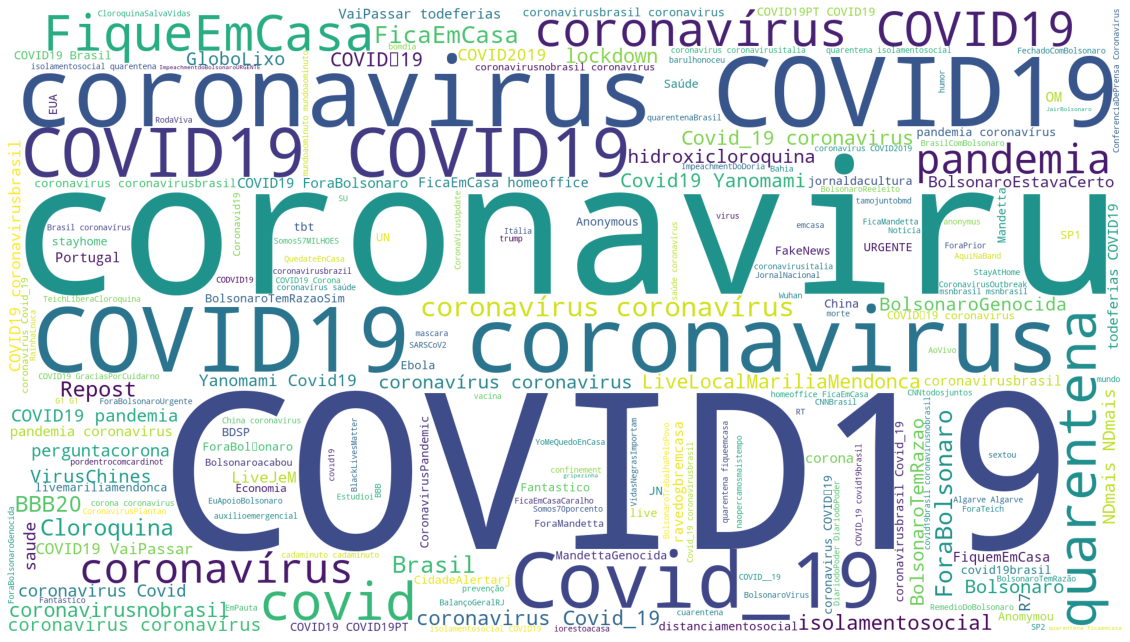

In [ ]:
# concatenando as palavras
all_hashtags = " ".join(s for s in hashtags)

# criando a nuvem de palavras
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(all_hashtags)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Observe que há várias ocorrências de tags repetidas, como *COVID19*. Será necessário fazer mais um tratamento nos dados das hashtags para agrupar essas ocorrências repetidas.

Após o tratamento, vamos escrever aqui os resultados. Mas já podemos observar que as hashtags mais postadas foram *#COVID19*, *#coronavirus*, *#FiqueEmCasa*, *#pandemia* e *#quarentena*.

# Gerando *dataset* DuvidasDB com perguntas extraídas do *dataset* original

In [ ]:
import re

def get_questions(txt):
  "gets  all the questions that are in the txt"
  return re.findall('[A-Za-z].*\?', txt)

In [ ]:
# get tweet series
tweets = data.texto
tweets.head(5)

788393     RT @RyanAFournier: This morning, Joe Biden sai...
610962     Japanese author Murakami to DJ 'Stay Home' rad...
113733     FDA pide a recuperados de covid-19 donar sangr...
1491980    Ronda global de noticias de coronavirus este 7...
1519974    @Fabiodedao Eu levarei a nova schin que aí vai...
Name: texto, dtype: object

In [ ]:
# apply 'get_questions' in all tweets
questions_arrays = tweets.apply(get_questions)
print(questions_arrays)

788393                                                    []
610962                                                    []
113733                                                    []
1491980                                                   []
1519974                                                   []
                                 ...                        
1190679                                                   []
1219334                                                   []
895859                                                    []
1596157                                                   []
899761     [durshino @oitiocaio @ytgabrielbrito @felipene...
Name: texto, Length: 1658825, dtype: object


A fazer: aplicar a função de extrair perguntas sobre o conteúdo completo do tweet. Para isso, será necessário baixar o texto usando a URL do tweet. Para isso, vamos obter as short URLs dos tweets que as têm.

In [ ]:
# obtain full content for tweet series
def has_URL(tweet):
  "Scan through string looking for a tweet URL, returning True if it has or False otherwise."
  return re.search('https.*$', tweet) != None  

def get_URL(tweet):
  return re.findall('https.*$', tweet)

has = tweets[tweets.apply(has_URL)]
urls = has.apply(get_URL)
display(urls)

610962     [https://t.co/tgI9AlnjSP https://t.co/qNqt3yM747]
113733                             [https://t.co/dPKeZ4fO8U]
1491980                            [https://t.co/8OXkbEYryO]
1575426                            [https://t.co/6OxxgwU1LJ]
1315331                            [https://t.co/PB53QutiF4]
                                 ...                        
1063676                            [https://t.co/mCpFLVgv8L]
592946                             [https://t.co/dFYc3dFKBJ]
1219334                            [https://t.co/JrsYmyRPzt]
895859                             [https://t.co/mlgvsO9prP]
899761                             [https://t.co/8ZA2PnyXrH]
Name: texto, Length: 1096275, dtype: object

Abaixo, vamos elaborar uma estratégia para obter o texto completo do tweet usando sua short URL.

In [ ]:
import tweepy

consumer_key = "vXpGl6obnpLwkP6OBqxIgvBX3"
consumer_secret = "rIOwNZ80HMqz9fkpKQ8XompdoCC0f11YmdI3jXTH2dyUM30rIM"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Por enquanto, vou obter o texto completo usando o ID do tweet. 
# Posteriormente, desejo obter o texto completo a partir da short URL.
def get_full_text_using_id(tweet_id):
  status = api.get_status(tweet_id, tweet_mode = "extended")
  return status.full_text

tweet_id = 1240115265423147017
print(get_full_text_using_id(tweet_id))

Em ação preventiva, o Governo do Estado suspendeu as aulas da rede estadual até 31 de março. ⁣
⁣
Esta ação está alinhada às estratégias de combate à proliferação do novo Coronavírus (Covid-19) no Pará. ❌🦠⁣
⁣Somente a distribuição da merenda escolar será mantida🥤🍎⁣
⁣📚⁣ https://t.co/iUsQEbEi5C


#**Processando as palavras das frases**

In [ ]:
interrogacao ='?'
data['interrogativa'] = np.where(data['texto'].str.find(interrogacao)!= -1, True, False)
data.head()

data          usuario  ... dia_da_semana interrogativa
788393  2020-05-23 23:08:17  Donald J. Trump  ...      Saturday         False
610962  2020-05-12 09:40:41          Reuters  ...       Tuesday         False
113733  2020-04-16 15:40:07   CNN en Español  ...      Thursday         False
1491980 2020-04-07 21:30:08   CNN en Español  ...       Tuesday         False
1519974 2020-02-26 03:28:52   Danilo Gentili  ...     Wednesday         False

[5 rows x 16 columns]

In [ ]:
data['interrogativa'].value_counts()

False    1486324
True      172501
Name: interrogativa, dtype: int64

In [ ]:
df1 = data[data['interrogativa'] != False]
df1.head()

data       usuario  ... dia_da_semana interrogativa
513669  2020-06-29 15:07:25  Luciano Huck  ...        Monday          True
1373974 2020-06-05 12:00:00            G1  ...        Friday          True
1421053 2020-06-07 22:20:00            G1  ...        Sunday          True
899996  2020-05-25 19:30:00            G1  ...        Monday          True
1427577 2020-05-27 21:45:00            G1  ...     Wednesday          True

[5 rows x 16 columns]

In [ ]:
textosPuros = df1['texto']
print(textosPuros)

513669     Qtas vezes nos chocamos c/ os números da violê...
1373974    #OAssunto - O que a ciência já sabe sobre o us...
1421053    #OAssunto - Perdeu algum episódio da semana? A...
899996     #Áudio - "Eu te amo tá? Eu não vou falar não, ...
1427577    #Desabafo - "O que vai acontecer com a gente?'...
                                 ...                        
1190675    @SespaPara Estamos precisando do TAMIFLU 75 mg...
89642      @tvbrasilgov @jairbolsonaro A minha dúvida é: ...
424090     @deputadomoraes @FlavioBolsonaro Sabe quanto c...
1278846    @VEJA @BlogdoNoblat Tá esperando o q? E veja c...
899761     @durshino @oitiocaio @ytgabrielbrito @felipene...
Name: texto, Length: 172501, dtype: object


In [ ]:
frases = textosPuros.str.lower()
print(frases)

513669     qtas vezes nos chocamos c/ os números da violê...
1373974    #oassunto - o que a ciência já sabe sobre o us...
1421053    #oassunto - perdeu algum episódio da semana? a...
899996     #áudio - "eu te amo tá? eu não vou falar não, ...
1427577    #desabafo - "o que vai acontecer com a gente?'...
                                 ...                        
1190675    @sespapara estamos precisando do tamiflu 75 mg...
89642      @tvbrasilgov @jairbolsonaro a minha dúvida é: ...
424090     @deputadomoraes @flaviobolsonaro sabe quanto c...
1278846    @veja @blogdonoblat tá esperando o q? e veja c...
899761     @durshino @oitiocaio @ytgabrielbrito @felipene...
Name: texto, Length: 172501, dtype: object


In [ ]:
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases] # Quebra por palavras(pontuações)
print(textosQuebrados)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')

dicionario = set()

for lista in textosQuebrados:
    validas = [stemmer.stem(palavra) for palavra in lista if len(palavra) > 2 and palavra not in stopwords and palavra.find("//") == -1]
    dicionario.update(validas)

totalDePalavras = len(dicionario)

print("Quantidade toda de palavras distintas:", totalDePalavras)
print(dicionario)

Quantidade toda de palavras distintas: 112363
{'limonadahq', 'm0rr4', 'danmotarj', 'branco…', 'ijensenacki', 'reremorgann', 'manojuoliveira1', 'jorgematte', '313.000', 'mob', 'absur…', 'reuquinol', '.progr', 'hahahahahahahhahahhah', 'mbmchav', 'artursbs', 'giffonimaril', 'glaub', 'olokodafot', 'sala', 'sident', 'brasilvieg', 'leonardonascim1', 'eduardodeabre17', 'percentua…', 'fifawill22', 'bipnnasc', 'anir', 'caragu', 'exclarec', 'matheuz', 'irrisóri', 'ekş', 'unroll', 'blackschoulz', 'quarentena/fechacomércio/ñ', 'querían', 'jaguproducciones…', 'marcosfss', 'joana_xpt00', '-0,56', 'exxocet', 'panific', 'kikii_vnzl', 'tsarina_nu', 'carud', 'falltasex', 'conhecimento…', 'tu-', 'ondin', 'legalmen…', 'pedrocrf0', 'ju_jamnik', 'टुकड़ा', 'atendo-s', 'crismenshov', '😑😑😑😑', 'albertonaval1', 'gaab_di', 'aitofel2nonat', 'querelare/denunci', 'anastáci', 'priorsa', 'sarado.😂😂', 'informacaop', 'atendendo…', 'faxineir…', 'bloqueiocomercialchinesj', 'fundamentel', 'scan', 'alberto_janon', 'chuchoag

In [ ]:
tuplas = zip(dicionario, range(totalDePalavras))#Gera a relação PALAVRA & INDICE

tradutor = {palavra: indice for palavra, indice in tuplas}
print("TRADUTOR!", tradutor)

TRADUTOR! {'limonadahq': 0, 'm0rr4': 1, 'danmotarj': 2, 'branco…': 3, 'ijensenacki': 4, 'reremorgann': 5, 'manojuoliveira1': 6, 'jorgematte': 7, '313.000': 8, 'mob': 9, 'absur…': 10, 'reuquinol': 11, '.progr': 12, 'hahahahahahahhahahhah': 13, 'mbmchav': 14, 'artursbs': 15, 'giffonimaril': 16, 'glaub': 17, 'olokodafot': 18, 'sala': 19, 'sident': 20, 'brasilvieg': 21, 'leonardonascim1': 22, 'eduardodeabre17': 23, 'percentua…': 24, 'fifawill22': 25, 'bipnnasc': 26, 'anir': 27, 'caragu': 28, 'exclarec': 29, 'matheuz': 30, 'irrisóri': 31, 'ekş': 32, 'unroll': 33, 'blackschoulz': 34, 'quarentena/fechacomércio/ñ': 35, 'querían': 36, 'jaguproducciones…': 37, 'marcosfss': 38, 'joana_xpt00': 39, '-0,56': 40, 'exxocet': 41, 'panific': 42, 'kikii_vnzl': 43, 'tsarina_nu': 44, 'carud': 45, 'falltasex': 46, 'conhecimento…': 47, 'tu-': 48, 'ondin': 49, 'legalmen…': 50, 'pedrocrf0': 51, 'ju_jamnik': 52, 'टुकड़ा': 53, 'atendo-s': 54, 'crismenshov': 55, '😑😑😑😑': 56, 'albertonaval1': 57, 'gaab_di': 58, 'ai

In [ ]:
sequencia_palavras = []
for e in tradutor:
    sequencia_palavras.append(e)

In [ ]:
def vetorizar_texto(texto, tradutor, stemmer): # Representando cd.. a frase em um array
    vetor = [0] * len(tradutor) # vetor com N POSIÇÕES ## Constroi o vetor para cada FRASE, traduz uma palavra para uma posição do vetor
    for palavra in texto:
        if len(palavra) > 0:# Comparando a palavra com a sua raíz
            raiz = stemmer.stem(palavra)
            if raiz in tradutor:
                posicao = tradutor[raiz]
                vetor[posicao] += 1
    return vetor
vetoresDeTexto = [vetorizar_texto(texto, tradutor, stemmer) for texto in textosQuebrados] # Função para vetorizar os textos, passa por todas as frases
resultado = [sum(x) for x in zip(*vetoresDeTexto)]
print(resultado)

In [ ]:
data = {
    'palavra' : sequencia_palavras,
    'repeticao' : resultado
}

palavra_repeticao = pd.DataFrame(data,columns=['palavra','repeticao'])

print("DATA FRAME: \n", palavra_repeticao)

In [ ]:
palavra_repeticao.sort_values(['repeticao'], ascending=False).head(50)

In [ ]:
print("Quantidade TOTAL de radicais das palavras: ", len(palavra_repeticao))

In [ ]:
df1.head()

#**LUGARES**

In [ ]:
lugares = df1[df1['lugar'].notnull()]

lugares.head()

In [ ]:
cidades = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CIDADES-ESTADOS.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
cidades.head(5)

In [ ]:
localizacao = pd.merge(lugares, cidades, how='left', left_on='lugar', right_on='nome_cidade')
localizacao.head()

In [ ]:
localizacao = localizacao.drop(['apelido', 'texto','retweet','seguidores','idioma','hashtags','interrogativa'],axis=1)
localizacao.head()

In [ ]:
localizacao.regiao.value_counts('regiao')

In [ ]:
localizacao.groupby('regiao').regiao.count()

# **TEMPO**

In [ ]:
import datetime
localizacao['data'].dtype

localizacao['data'] = pd.to_datetime(localizacao['data'], format='%d/%m/%Y %H:%M')


In [ ]:
conditions = [
    (localizacao.data.dt.hour >= 0) & (localizacao.data.dt.hour <=6),
    (localizacao.data.dt.hour > 6) & (localizacao.data.dt.hour <=12),
    (localizacao.data.dt.hour > 12) & (localizacao.data.dt.hour <=18),
    (localizacao.data.dt.hour > 18) & (localizacao.data.dt.hour <=23)
    ]
values = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

localizacao['partes_dia'] = np.select(conditions, values)
localizacao['dia_da_semana'] = localizacao.data.dt.day_name()

localizacao.head()

In [ ]:
localizacao.dtypes

In [ ]:
localizacao.groupby('partes_dia').regiao.count()

In [ ]:
localizacao.groupby(['regiao','partes_dia']).regiao.size()

In [ ]:
mapa = localizacao.groupby(['nome_cidade']).regiao.size()
mapa.head(20)

In [ ]:
mapa = localizacao.groupby(['regiao','nome_cidade']).regiao.size()
mapa.head(20)

In [ ]:
mapa.to_frame()

In [ ]:
mapa.dtypes

In [ ]:
import folium 
# Make a data frame with dots to show on the map
data1 = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data1

In [ ]:
m = folium.Map(location=[-16.1237611, -59.9219642],
    zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(data1)):
   folium.Circle(
      location=[data1.iloc[i]['lon'], data1.iloc[i]['lat']],
      popup=data1.iloc[i]['name'],
      radius=data1.iloc[i]['value']*10000.0,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m
# Save it as html
#m.save('mymap.html')

# Buscar palavras de um tema em um dado texto

A seguir uma estratégia simples pra buscar os temas desejados nos textos que tem perguntas. Essa estratégia usa uma lista de palavras de um tema específico.

In [ ]:
def busca_tema(texto, palavras_do_tema):
  'Retorna True se o texto tem pelo menos uma palavra do tema'
  for palavra in palavras_do_tema:
    tem_palavra = re.search(palavra, str(texto).lower())
    if tem_palavra != None:
      return True
  return False

Um exemplo de como a função pode ser usada

In [ ]:
# cria dicionáário de perguntas
perguntas_dicionario = {'perguntas': ["Bolsonaro está com covid19?", "A cloroquina é um medicamento seguro?", "Seria esse o fim do Brasil? #elenao", "Dá pra tratar covid com xarope caseiro?"]}

# cria dataframe com perguntas
temas_dataframe = pd.DataFrame(perguntas_dicionario)
temas_dataframe

perguntas
0              Bolsonaro está com covid19?
1    A cloroquina é um medicamento seguro?
2      Seria esse o fim do Brasil? #elenao
3  Dá pra tratar covid com xarope caseiro?

In [ ]:
# cria uma lista de palavras para o tema 'pessoa'
pessoas = ['bolsonaro', 'mandetta', 'elenao', 'presidente', 'lula']

# cria a coluna pessoa no dataframe que indica se o tema existe ou não na pergunta
temas_dataframe['pessoas'] = temas_dataframe['perguntas'].apply(busca_tema,args=(pessoas,))
temas_dataframe

perguntas  pessoas
0              Bolsonaro está com covid19?     True
1    A cloroquina é um medicamento seguro?    False
2      Seria esse o fim do Brasil? #elenao     True
3  Dá pra tratar covid com xarope caseiro?    False